In [1]:
import pandas as pd
import numpy as np
import csv  
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
df_tur_18 = pd.read_csv('tur1718.csv')
df_tur_19 = pd.read_csv('tur1819.csv')
df_tur_20 = pd.read_csv('tur1920.csv')
df_tur = pd.concat([df_tur_18,df_tur_19,df_tur_20])

In [3]:
df_tur.head()

,date,region,league,home,home_oelo,home_nelo,result,home_win,draw,away_win,away,away_oelo,away_nelo
0,2018/05/19,Turkey,Süperlig,Besiktas,1952,1956,5 - 1,77,15,8,Sivasspor,1662,1658
1,2018/05/19,Turkey,Süperlig,Fenerbahçe,1906,1908,3 - 2,74,17,10,Atiker Konyaspor,1654,1652
2,2018/05/19,Turkey,Süperlig,Istanbul Basaksehir F.K.,1869,1872,3 - 2,70,19,12,Kasimpasa SK,1661,1658
3,2018/05/19,Turkey,Süperlig,Göztepe,1608,1602,0 - 1,22,26,53,Galatasaray,1861,1867
4,2018/05/19,Turkey,1. Lig,Gaziantep FK(as Gazisehir Gaziantep FK),1533,1532,0 - 0,38,29,33,BB Erzurumspor,1509,1510


In [4]:
pd.Series({c: df_tur["league"].unique() for c in df_tur["league"]})
vl = df_tur["league"].value_counts()
print(vl.to_string())

1. Lig                  894
Süperlig                873
Turkey Cup              154
Europa League            55
Europa League q.         22
Champions League         20
Champions League q.       8
Turkey Supercup           3


In [5]:
vc = df_tur[['home', 'away']].apply(pd.Series.value_counts)
vc = vc.fillna(0)
vc["home"] = vc["away"] + vc["home"]
vc = vc.drop("away", 1)
vc = vc.rename(columns={'home': 'id_count'})
vc = vc.sort_values(by='id_count', ascending=False)
print(vc.to_string())

                                         id_count
Besiktas                                    133.0
Galatasaray                                 132.0
Fenerbahçe                                  129.0
Istanbul Basaksehir F.K.                    128.0
Akhisar Belediyespor                        124.0
Trabzonspor                                 123.0
Yeni Malatyaspor                            111.0
BB Erzurumspor                              111.0
Alanyaspor                                  111.0
Atiker Konyaspor                            109.0
Ümraniyespor                                108.0
Kayserispor                                 107.0
Antalyaspor                                 107.0
Giresunspor                                 107.0
Boluspor                                    106.0
Göztepe                                     106.0
Bursaspor                                   106.0
Adana Demirspor                             106.0
Çaykur Rizespor                             105.0


<ipython-input-5-8155b6fd0297>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vc = vc.drop("away", 1)


In [6]:
vc.describe()

,id_count
count,101.000000
mean,40.178218
std,48.767283
min,1.000000
25%,2.000000
50%,4.000000
75%,102.000000
max,133.000000


In [7]:
df_tur['league'].describe()

count        2029
unique          8
top       1. Lig 
freq          894
Name: league, dtype: object

In [8]:
df_tur['home_oelo'].describe()

count    2029.000000
mean     1590.566289
std       155.853836
min      1175.000000
25%      1477.000000
50%      1588.000000
75%      1663.000000
max      2311.000000
Name: home_oelo, dtype: float64

In [9]:
df_tur['away_oelo'].describe()

count    2029.000000
mean     1590.436175
std       155.942324
min      1177.000000
25%      1480.000000
50%      1590.000000
75%      1662.000000
max      2312.000000
Name: away_oelo, dtype: float64

In [10]:
(df_tur['home_oelo']-df_tur['away_oelo']).describe()

count    2029.000000
mean        0.130113
std       154.659194
min      -713.000000
25%       -99.000000
50%         0.000000
75%        97.000000
max       715.000000
dtype: float64

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


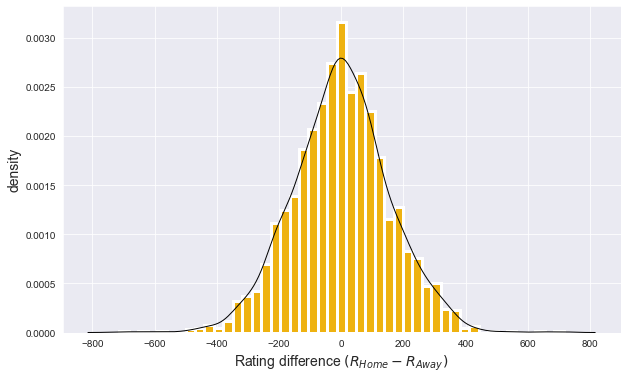

In [12]:
fig = plt.figure(figsize=(10,6))
p = sns.distplot((df_tur['home_oelo']-df_tur['away_oelo']), color='#EEB211',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#EEB211'}
                )
sns.set_style("darkgrid")
p.set_xlabel("Rating difference $(R_{Home} - R_{Away})$", fontsize = 14)
p.set_ylabel("density", fontsize = 14)
plt.show()

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


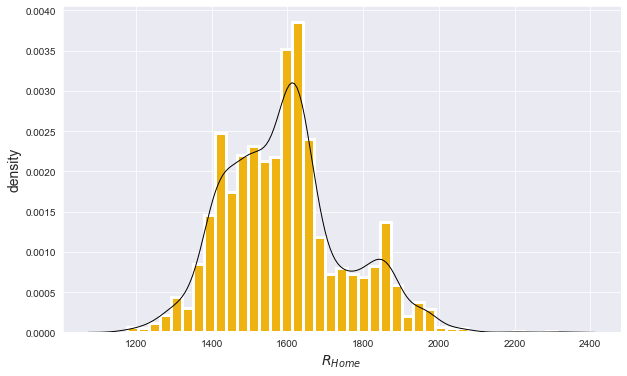

In [13]:
fig = plt.figure(figsize=(10,6))
p = sns.distplot((df_tur['home_oelo']), color='#EEB211',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#EEB211',
                         }
                )
sns.set_style("darkgrid")
p.set_xlabel("$R_{Home}$", fontsize = 14)
p.set_ylabel("density", fontsize = 14)
plt.show()

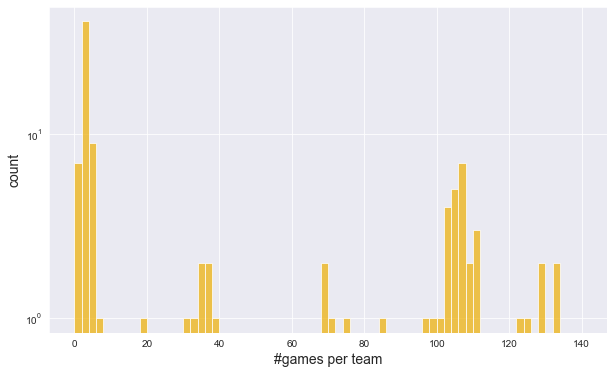

In [14]:
fig = plt.figure(figsize=(10,6))
p = sns.histplot(vc['id_count'], color='#EEB211', 
                 binwidth = 2,
                 binrange = [0,140],
                 legend = False,
                 log_scale=(False,True)
                )
sns.set_style("darkgrid")
p.set_xlabel("#games per team", fontsize = 14)
p.set_ylabel("count", fontsize = 14)
plt.show()

In [16]:
df_tur_c1 = df_tur.drop(df_tur[df_tur['home_oelo']<1663].index)
df_tur_c2 = df_tur.drop(df_tur[df_tur['home_oelo']>1477].index)

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


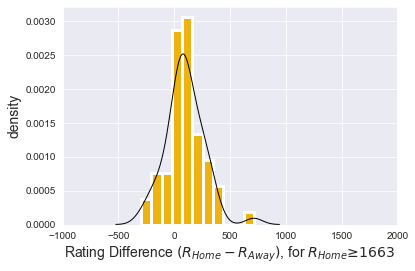

In [17]:
fig = plt.figure(figsize=(6,4))
p = sns.distplot((df_tur_c1['home_oelo']-df_tur_c1['away_oelo']), color='#EEB211',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#EEB211'},
                )
sns.set_style("darkgrid")
plt.xlim(-1000, 2000)
p.set_xlabel("Rating Difference $(R_{Home} - R_{Away})$, for $R_{Home} ≥ 1663$", fontsize = 14)
p.set_ylabel("density", fontsize = 14)
plt.show()

c:\users\grotzi\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


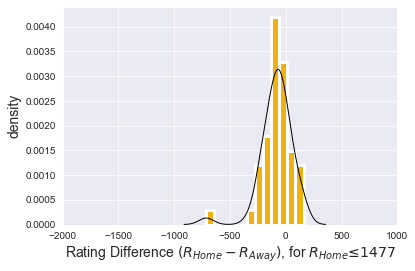

In [18]:
fig = plt.figure(figsize=(6,4))
p = sns.distplot((df_tur_c2['home_oelo']-df_tur_c2['away_oelo']), color='#EEB211',
                kde_kws={"color": "k", "lw": 1, "label": "KDE"},
                hist_kws={"linewidth": 3,
                            "alpha": 1, "color": '#EEB211'},
                )
sns.set_style("darkgrid")
plt.xlim(-2000, 1000)
p.set_xlabel("Rating Difference $(R_{Home} - R_{Away})$, for $R_{Home} ≤ 1477$", fontsize = 14)
p.set_ylabel("density", fontsize = 14)
plt.show()